# Vision Transformers

- Coder: Lenin G. Falconí
- Fecha: 2025-01-21

## Preprocesamiento

In [2]:
from transformers import image_transforms
from PIL import Image
from io import BytesIO
import requests
import numpy as np
import matplotlib.pyplot as plt

Lectura de imagen

(511, 509, 3)


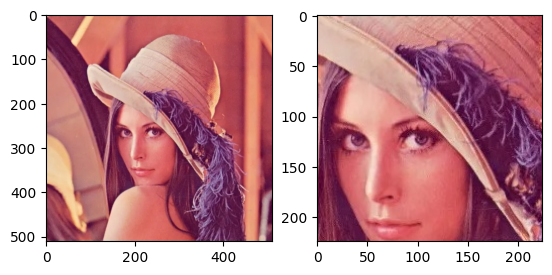

In [3]:
# Fetch the image from the URL using requests
response = requests.get("https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/elena.jfif?raw=true")
original_image = Image.open(BytesIO(response.content))
img_arr = np.array(original_image)
print(img_arr.shape)
cropped_image = image_transforms.center_crop(img_arr, (224,224))
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.subplot(1, 2, 2)
plt.imshow(cropped_image)

## Clasificación
Se puede usar un pipeline de Huggingface mas un modelo seleccionado para llevar a cabo una clasificación

In [4]:
from transformers import pipeline
classifier = pipeline(task="image-classification", model="google/vit-base-patch16-224")
# clasificar desde una url
img_url = "https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/elena.jfif?raw=true"
y_pred = classifier(img_url)
y_pred

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': 'cowboy hat, ten-gallon hat', 'score': 0.7050998210906982},
 {'label': 'sombrero', 'score': 0.15164554119110107},
 {'label': 'cowboy boot', 'score': 0.01975991204380989},
 {'label': 'brassiere, bra, bandeau', 'score': 0.01590256206691265},
 {'label': 'bonnet, poke bonnet', 'score': 0.008532692678272724}]

### Ejercicio 1
1.  Probar el código de clasificación usando pipeline, con varias imágenes cargadas  en Kaggle, con `k=3`. Explicar.
2. Croppear una imagen: convertir una imagen a un arreglo NumPy, recortar el centro de la imagen a un tamaño `200x200`, mostrar el resultado usando matplotlib.
3.  Clasificar la imagen recortada usando: `model="abhishek/autotrain_fashion_mnist_vit_base`

### Clasificando varias imagenes

In [5]:
from  pprint import pprint

In [6]:
img_url1 = "https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/shirt1.jpg?raw=true"
img_url2 = "https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/jacket.jpg?raw=true"
img_url3 = "https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/victorianCloth.png?raw=true"
img_url4 = "https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/cellist.jpg?raw=true"
img_url5 = "https://github.com/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/images/guitar.jpg?raw=true"

images = [img_url1, img_url2, img_url3, img_url4, img_url5]

results = classifier(images, top_k=3)
pprint(results)

[[{'label': 'Windsor tie', 'score': 0.5228702425956726},
  {'label': 'bolo tie, bolo, bola tie, bola', 'score': 0.11160428076982498},
  {'label': 'bow tie, bow-tie, bowtie', 'score': 0.07946683466434479}],
 [{'label': 'suit, suit of clothes', 'score': 0.7754809260368347},
  {'label': 'Windsor tie', 'score': 0.15084107220172882},
  {'label': 'wool, woolen, woollen', 'score': 0.00728420028463006}],
 [{'label': 'trench coat', 'score': 0.3409954011440277},
  {'label': 'fur coat', 'score': 0.22674283385276794},
  {'label': 'gasmask, respirator, gas helmet', 'score': 0.0682905837893486}],
 [{'label': 'cello, violoncello', 'score': 0.9982319474220276},
  {'label': 'violin, fiddle', 'score': 0.0005453838966786861},
  {'label': 'bassoon', 'score': 0.00011239327432122082}],
 [{'label': 'acoustic guitar', 'score': 0.8669602870941162},
  {'label': 'electric guitar', 'score': 0.07889844477176666},
  {'label': 'pick, plectrum, plectron', 'score': 0.03388594090938568}]]


Classification result for image 1:
[{'label': 'Windsor tie', 'score': 0.5228702425956726},
 {'label': 'bolo tie, bolo, bola tie, bola', 'score': 0.11160428076982498},
 {'label': 'bow tie, bow-tie, bowtie', 'score': 0.07946683466434479}]


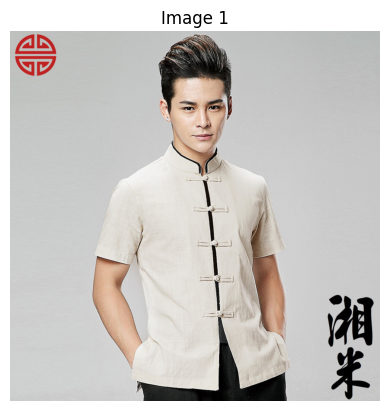

Classification result for image 2:
[{'label': 'suit, suit of clothes', 'score': 0.7754809260368347},
 {'label': 'Windsor tie', 'score': 0.15084107220172882},
 {'label': 'wool, woolen, woollen', 'score': 0.00728420028463006}]


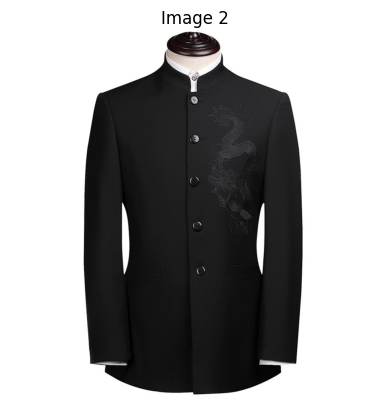

Classification result for image 3:
[{'label': 'trench coat', 'score': 0.3409954011440277},
 {'label': 'fur coat', 'score': 0.22674283385276794},
 {'label': 'gasmask, respirator, gas helmet', 'score': 0.0682905837893486}]


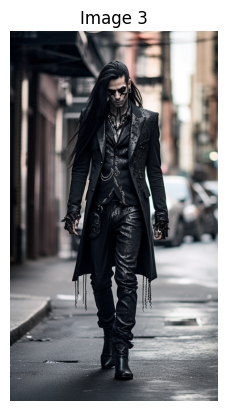

Classification result for image 4:
[{'label': 'cello, violoncello', 'score': 0.9982319474220276},
 {'label': 'violin, fiddle', 'score': 0.0005453838966786861},
 {'label': 'bassoon', 'score': 0.00011239327432122082}]


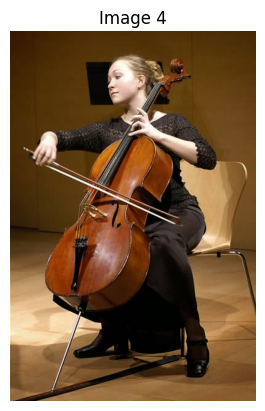

Classification result for image 5:
[{'label': 'acoustic guitar', 'score': 0.8669602870941162},
 {'label': 'electric guitar', 'score': 0.07889844477176666},
 {'label': 'pick, plectrum, plectron', 'score': 0.03388594090938568}]


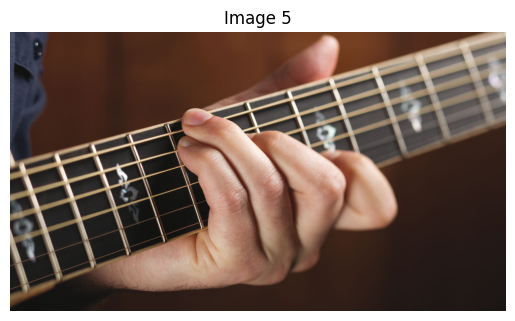

In [7]:
# prompt: write a code to display the classification result and the image that it corresponds use the images located in the images array and the results in results

# Assuming 'results' and 'images' are defined as in the provided code

for i, result in enumerate(results):
  print(f"Classification result for image {i+1}:")
  pprint(result)

  # Fetch and display the image
  response = requests.get(images[i])
  try:
      image = Image.open(BytesIO(response.content))
      plt.figure()  # Create a new figure for each image
      plt.imshow(image)
      plt.title(f"Image {i+1}")
      plt.axis('off')  # Hide axis ticks and labels
      plt.show()
  except Exception as e:
      print(f"Error displaying image {i+1}: {e}")

### Explicación

Puede observarse que existen dificultades de reconocimiento en algunas imágenes. Por ejemplo, en estilos extremos como el gótico hace una buena primera aproximación. En las imágenes de origen chino los resultados en ~k=3~ no parecen ser los mejores. Esto puede deberse a que el modelo usado en este caso es genérico y no enfocado en artículos de ropa.

### Recortar imagen y obtener clasificación

Device set to use cuda:0


(800, 800, 3)


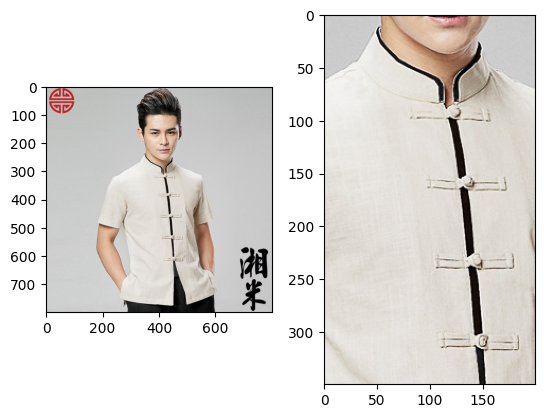

In [29]:
# classifier = pipeline(task="image-classification", model="google/vit-base-patch16-224")
fashion_classifier = pipeline(task="image-classification", model="abhishek/autotrain_fashion_mnist_vit_base")
img = Image.open(BytesIO(requests.get(img_url1).content))
img_arr = np.array(img)
print(img_arr.shape)
img_cropped = image_transforms.center_crop(img_arr, (350,200))
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.subplot(1, 2, 2)
plt.imshow(img_cropped)

In [30]:
result = fashion_classifier(Image.fromarray(img_cropped))
pprint(result)

[{'label': 'T - shirt / top', 'score': 0.9134708046913147},
 {'label': 'Coat', 'score': 0.8482733964920044},
 {'label': 'Pullover', 'score': 0.7381410002708435},
 {'label': 'Shirt', 'score': 0.665132462978363},
 {'label': 'Bag', 'score': 0.5161021947860718}]


## Visual QA


In [32]:
from transformers import pipeline

vqa = pipeline(task="visual-question-answering", model="dandelin/vilt-b32-finetuned-vqa")



config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

Device set to use cuda:0


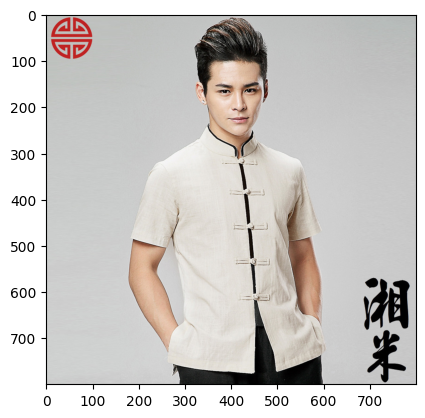

In [33]:
plt.imshow(img_arr)

In [35]:
result = vqa(image=Image.fromarray(img_arr), question="What is the color of the shirt?")
pprint(result)

[{'answer': 'white', 'score': 0.9841967225074768},
 {'answer': 'beige', 'score': 0.13762019574642181},
 {'answer': 'tan', 'score': 0.13068686425685883},
 {'answer': 'cream', 'score': 0.0362825021147728},
 {'answer': 'brown', 'score': 0.01128043420612812}]


### Ejercicio 2

Utilice imágenes propias para hacer preguntas sobre su contenido usando el modelo de visual question answering

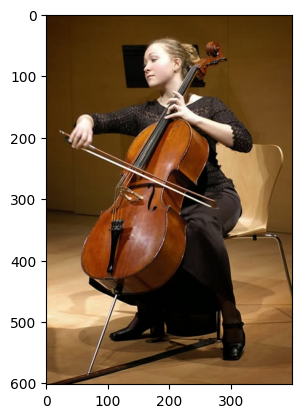

In [49]:
img = Image.open(BytesIO(requests.get(img_url4).content))
plt.imshow(img)


In [50]:
result  = vqa(image=img, question="What musical instrument is the girl playing?")
pprint(result)

[{'answer': 'piano', 'score': 0.06763234734535217},
 {'answer': 'bow', 'score': 0.02158547379076481},
 {'answer': 'guitar', 'score': 0.013094919733703136},
 {'answer': 'yes', 'score': 0.007876774296164513},
 {'answer': 'umbrella', 'score': 0.007846958935260773}]


In [51]:
result  = vqa(image=img, question="What is the girl's hair color?")
pprint(result)

[{'answer': 'blonde', 'score': 0.992519736289978},
 {'answer': 'brown', 'score': 0.05247894302010536},
 {'answer': 'red', 'score': 0.023634277284145355},
 {'answer': 'gold', 'score': 0.007867269217967987},
 {'answer': 'ponytail', 'score': 0.005309558007866144}]


In [52]:
result  = vqa(image=img, question="what color are her shoes?")
pprint(result)

[{'answer': 'black', 'score': 0.9959133267402649},
 {'answer': 'brown', 'score': 0.025454362854361534},
 {'answer': 'black and white', 'score': 0.0078076692298054695},
 {'answer': 'gray', 'score': 0.0024140956811606884},
 {'answer': 'white', 'score': 0.0019264569273218513}]


### Document analysis

Uso de modelos que procesan imagenes de documentos para realizar pregntas sobre el documento

### Ejercicio 3
 Practicar document QA que analiza la imagen de un documento, por ejemplo un  contrato, lo convierte en texto y permite que se realicen preguntas sobre el texto

In [53]:
 dqa = pipeline( task="document-question-answering",
                model="naver-clova-ix/donut-base-finetuned-docvqa")

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.47.1",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

Device set to use cuda:0


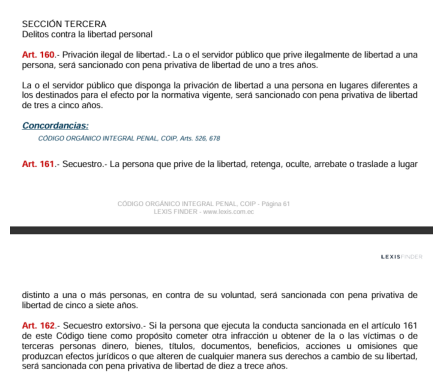

In [57]:
from PIL import Image
from io import BytesIO
import requests

def open_gyazo_image(gyazo_url):
  """Opens a Gyazo image using its URL.

  Args:
    gyazo_url: The URL of the Gyazo image.

  Returns:
    A PIL Image object representing the Gyazo image.
  """
  # Extract the image ID from the URL
  image_id = gyazo_url.split('/')[-1].split('?')[0]

  # Construct the raw image URL
  raw_image_url = f"https://i.gyazo.com/{image_id}.png"

  # Fetch the image data using requests
  response = requests.get(raw_image_url, stream=True)
  response.raise_for_status()  # Raise an exception for bad responses

  # Open the image using PIL
  image = Image.open(BytesIO(response.content))

  return image

# Example usage
gyazo_url = "https://gyazo.com/7396cdfaca7ff3cf4eb004fc7de49f4e"
image = open_gyazo_image(gyazo_url)

# Now you can work with the 'image' object, e.g., display it
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

In [58]:
# Ask a question about the document
question = "What is the main topic of this document?"

# Get the answer
result = dqa(image=image, question=question)
pprint(result)

MBartModel is using MBartSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


[{'answer': 'codigo organico integral penal, coip - pagina 61'}]


In [59]:
# Ask a question about the document
question = "De qué se trata el artículo 160"

# Get the answer
result = dqa(image=image, question=question)
pprint(result)

[{'answer': ''}]


In [60]:
# Ask a question about the document
question = "What is Art 162 about?"

# Get the answer
result = dqa(image=image, question=question)
pprint(result)

[{'answer': 'sequestro extorsive'}]


1. Si las preguntas se hacen en inglés, el modelo es capaz de generar respuestas.
2. Si la pregunta se hace en español, el modelo no funciona.
3. Extrae relativamente bien la información de otro idiomia supongo que en inglés funciona mucho mejor por lo que podría ser de interés un modelo similar pero para español